# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!



## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Analiza danych dotyczących Irysów typu (setosa, versicolor, virginica)

##### Przygotowując niniejsze opracowanie będziemy zajmowali się analizowaniem cech różnych gatunków irysów w odniesieniu do poszczególnych gatunków. Zbadamy cechy kwiatów w obrębie każdego gatunku i sprawdzimy czy występują między nimi jakieś korelacje. 

#### Czy występują zależności pomiędzy poszczególnymi parametrami kwiatów (długość, szerokość - kielkicha; długość, szerokość - płatka)

In [3]:
# Sprawdzimy nazyw kolumn, typy danych i ilość wierszy oraz czy nie brakuje jakichś danych
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Widzimy jakie mamy dane oraz że wszystkie pola są wypełnione jakimiś danymi i nie ma pustych pól

#### Tutaj prezentujemy przykładowe dane dotyczące parametrów kwiatów 

In [4]:
# Zaczniemy od skrócenia nazw kolumn aby było szybciej się nimi posługiwać
df = df.rename(columns=
               {"długość kielicha (sepal length)": "długość kielicha",
               "szerokość kielicha (sepal width)": "szerokość kielicha",
               "długość płatka (petal length)": "długość płatka",
               "szerokość płatka (petal width)": "szerokość płatka",
               "klasa (class)":"klasa"}             
                )        
df

,długość kielicha,szerokość kielicha,długość płatka,szerokość płatka,klasa
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Graficzna prezentacja danych, dotyczących wielkości kwiatów (długości płatka i kielicha w całej badanej próbie)  

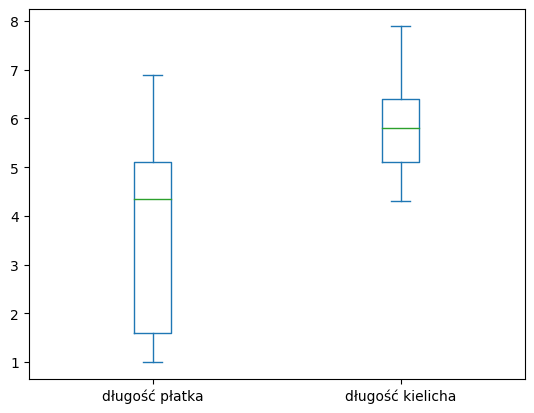

In [5]:
# Robimy wykres pokazujący długości płatka i kielicha w całej badanej próbce 
df.plot(kind='box', x='klasa', y=['długość płatka', 'długość kielicha'], legend=False);

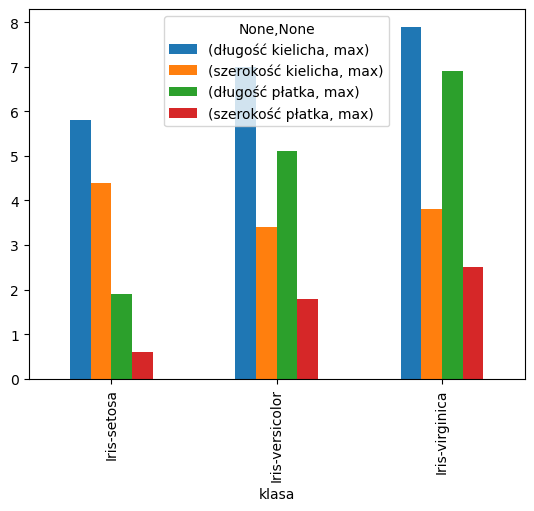

In [6]:
# Teraz zgrupujemy dane po kolumnie "Klasa" aby znależć najwyśze wartości dla każdej pozostałej kolumny.
# W ten sposób sprawdzimy jakie są najdłuższe i najszersze kielichy 
# oraz jakie są najdłuższe i najszersze płatki

df_grouped = df.groupby('klasa', as_index=False).agg({
    'długość kielicha':['max'],
    'szerokość kielicha':['max'],
    'długość płatka':['max'],
    'szerokość płatka':['max']
})
df_grouped.plot(kind='bar', x='klasa');

##### Na podstawie powyższego wykresu widać że gatunek Irys Virginica jest kwiatem największym z tych trzech gatunków.

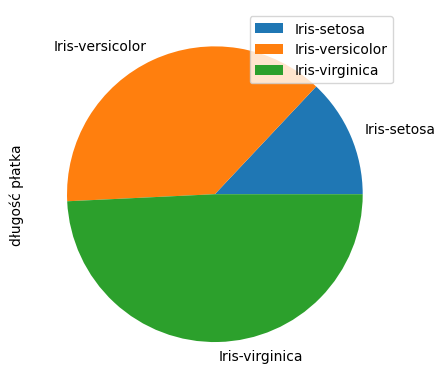

In [7]:
# Obliczymy średnie wartości dla każdej kolumny
df_srednie=df.groupby('klasa', as_index=False).mean()
df_srednie.plot(kind='pie', y='długość płatka', labels=df_srednie['klasa']);

#### Z powyższego wynika że średnie wielokości płatków również są największe dla gatunku Virginica

In [8]:
# Terraz będziemy sprawdzali zależności pomiędzy długościami oraz szerokościami dla kielicha i płatka

grouped_df=df.groupby('długość kielicha').mean(numeric_only=True)
#grouped_df.reset_index(inplace=True)
#grouped_df.plot(kind='bar', x='długość kielicha', y='długość płatka')

In [9]:
grouped_df.reset_index(inplace=True)

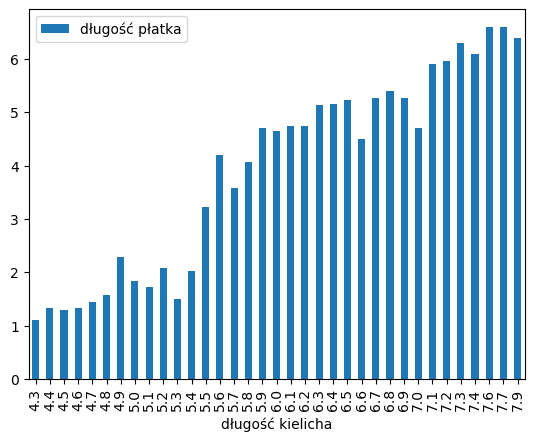

In [10]:
grouped_df.plot(kind='bar', x='długość kielicha', y='długość płatka');

#### Widzimy że wzrost długości kielicha powoduje dosyć proporcjonalny również wzrost długości płatków

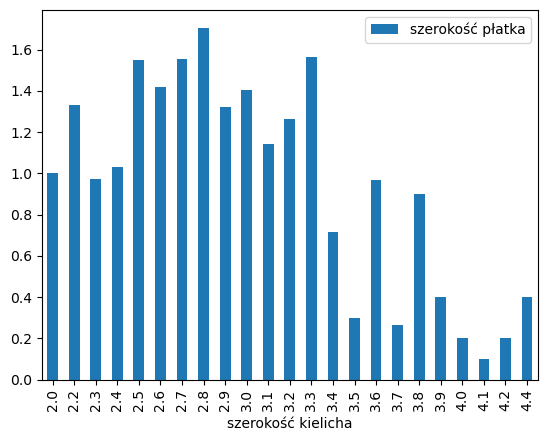

In [11]:
grouped_df=df.groupby('szerokość kielicha').mean(numeric_only=True)
grouped_df.reset_index(inplace=True)
grouped_df.plot(kind='bar', x='szerokość kielicha', y='szerokość płatka');

#### Widać że szerokość kielicha jest dosyć regularna we wszystkich gatunkach Irysów (mieści się w pewnym przedziale)

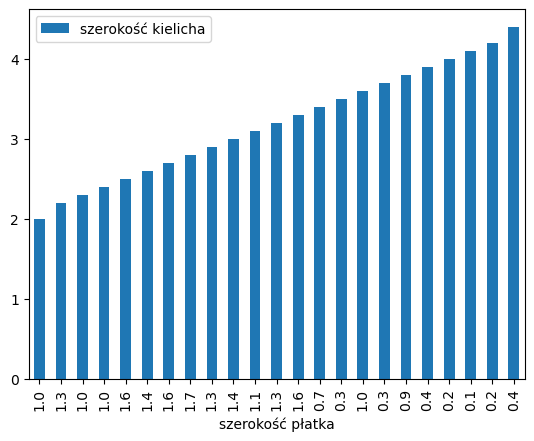

In [17]:
grouped_df=df.groupby('szerokość kielicha').mean(numeric_only=True)
grouped_df['szerokość płatka']=grouped_df['szerokość płatka'].round(1)
grouped_df.reset_index(inplace=True)
grouped_df.plot(kind='bar', x='szerokość płatka', y='szerokość kielicha');

#### Pokazanie zalezności pomiędzy szerokością płatka i szerokością kielicha

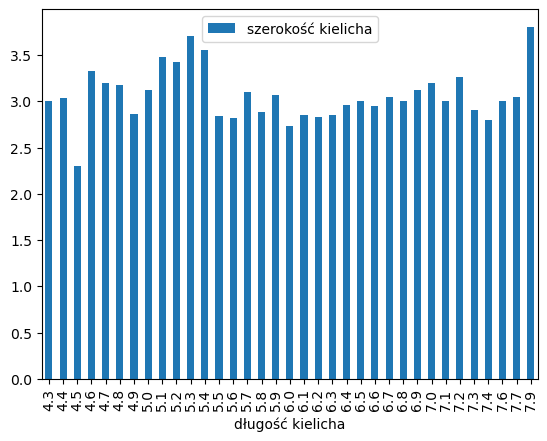

In [13]:
#Teraz sprawdzimy długość i szerokość kielicha 

grouped_df=df.groupby('długość kielicha').mean(numeric_only=True)
grouped_df.reset_index(inplace=True)
grouped_df.plot(kind='bar', x='długość kielicha', y='szerokość kielicha');

#### Graficzna ilustracja zależności pomiędzy długością i szerokością kielicha - na wykresie widać, że parametry te mieszczą się w pewnym przedziale (między 2,5 cm - 3,5 cm) 

In [14]:
# Sprawdzimy również (potwierdzimy na macierzy) korelację 
## pomiędzy długością i szerokością kielicha w  
# inny sposób niż wnioskowanie z wykresu powyżej
df[['długość kielicha', 'szerokość kielicha']].corr()

,długość kielicha,szerokość kielicha
długość kielicha,1.000000,-0.109369
szerokość kielicha,-0.109369,1.000000


#### Macierz korelacji wskazuje na brak zależności pomiędzy długością i szerokością kielicha

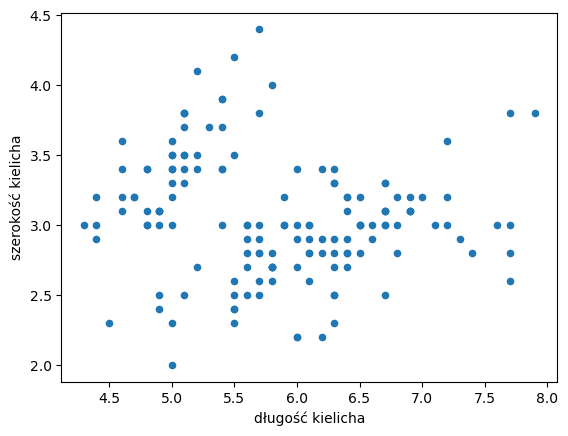

In [15]:
df.plot(kind='scatter', x='długość kielicha', y='szerokość kielicha');

#### Na podstawie przeanalizowanych danych jest możliwość stwierdzenia który gatunek Irysów jest gatunkiem największym i najmniejszym. Jest też możliwość zaobserwowania któe parametry kwiatów są od siebie zależne a któe mają te zależności na dużo mniejszym poziomie.